# Автономен расиплив робот

Автоматски воден подвижен робот редоследно ги извршува следните три операции за складирање на производи во рамките на некоја производствена постројка: првин врши земање на готов производ, потоа врши негово пренесување до магацин, и на крајот негово оставање на соодветна локација. После ова, се враќа на почетокот и го повторува циклусот.

При секоја од овие три операции, постои веројатност роботот да се расипе: 10% при земањето, 5% при преносот, и 20% при оставањето на производот. Доколку не се расипе, се претпоставува дека си ја завршил задачата и може да премине на следната. Доколку е расипан, тогаш се поправа со веројатност од 60% и се враќа на почетокот од циклусот (се претпоставува дека во тој случај некој работник или некој резервен систем го завршил циклусот на операции при кој дошло до расипувањето).


### Задача 1

По доволно долго работење, да се испита колкав дел од времето роботот минува во извршување на секоја од трите операции, а колкав дел од времето е во дефект.

### Задача 2

Да се најде просечното време на расипување на роботот при извршувањето на која било од трите операции.

## Решение

Ќе имаме 4 состојби. Тоа се `Земање`, `Пренос`, `Оставање` и `Дефект`. Роботот ќе врти низ редоследно низ состојбите `Земање`, `Пренос`, `Оставање`, а при секој дефект ќе оди во состојбата `Дефект`. Од `Дефект` се враќа во `Земање`.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pydtmc as mc

In [2]:
states = ['take', 'transport', 'deliver', 'repair']
p = pd.DataFrame([[0, 0.9, 0, 0.1], [0, 0, 0.95, 0.05], [0.8, 0, 0, 0.2], [0.6, 0, 0, 0.4]], columns=states, index=states)
p

take  transport  deliver  repair
take        0.0        0.9     0.00    0.10
transport   0.0        0.0     0.95    0.05
deliver     0.8        0.0     0.00    0.20
repair      0.6        0.0     0.00    0.40


DISCRETE-TIME MARKOV CHAIN
 SIZE:         4
 CLASSES:      1
  - RECURRENT: 1
  - TRANSIENT: 0
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  YES
 ERGODIC:      YES



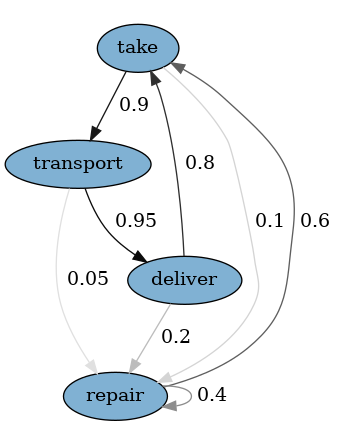

In [3]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain = mc.MarkovChain(p, states)
draw_markov_chain(chain)

### Одговор на задача 1

По доволно долго работење, да се испита колкав дел од времето роботот минува во извршување на секоја од трите операции, а колкав дел од времето е во дефект.

Ова го решаваме со стационарната распределба.


In [4]:
chain.pi

[array([0.30472321, 0.27425089, 0.26053834, 0.16048756])]

### Одговор на задача 2

Да се најде просечното време на расипување на роботот при извршувањето на која било од трите операции.

За средно време на расипување на роботот може да се смета просечното време роботот да излезе од дефект, да работи и пак да се расипе. Затоа, ќе го најдеме преку средно време на враќање во состојбата `Дефект`.


In [5]:
t = chain.mean_first_passage_times_to('repair')
t

array([8.71835443, 8.57594937, 7.97468354, 0.        ])

In [6]:
r = 1 + t @ p.loc['repair']
r

6.231012658227848

Добиваме дека тоа време е 6.23 секунди. Можеме да сметаме дека на секои 6.23 секунди роботот се распипува.

Истиот резултат можеме да го добиеме и со помош на симулација. Ја поставуваме почетната состојба во променливата `state`. Со функцијата `random.choice` случајно избираме која е следна состојба и ја ажурираме `state`. Притоа, во листата `times_repair`, цело време ги запишиуваме временските моменти кога роботот се наоѓа во дефектна состојба. По симулација, бараме извод од `times_repair` за да ги добиеме времињата од едно до наредно распување на роботот. Забележуваме дека резултатот е многу блиску е горенаведениот, аналитички пресметан резултат.

In [7]:
times_repair = []
state = 'take'
for i in range(100000):
    state = np.random.choice(states, p=p.loc[state])
    if state == 'repair':
        times_repair.append(i)

diff_times_repair = np.diff(times_repair)
diff_times_repair.mean()

6.267251645252272